# Taxa de Retorno Simples 

In [5]:
# # possiveis pips
# !pip install pandas_datareader --upgrade


In [2]:
#━━━━━━━━━━━━━━━━━━❮Bibliotecas❯━━━━━━━━━━━━━━━━━━
import numpy as np
import matplotlib.colors as plt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from pandas_datareader import data as wb

#━━━━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━━━

%matplotlib inline

In [7]:
yf.pdr_override()

PETR4 =wb.get_data_yahoo('PETR4.SA', start='2015-1-1')

[*********************100%%**********************]  1 of 1 completed


In [8]:
# PETR4.head(5)
# PETR4.tail(5)

# Formula Taxa de Retorno Simples

## (P1/P0)-1

In [9]:
PETR4['TRS'] =(PETR4['Adj Close']/PETR4['Adj Close'].shift(1))-1  #.shift valor anterior do que o valor calculado

print(PETR4['TRS'])

Date
2015-01-02         NaN
2015-01-05   -0.085470
2015-01-06   -0.032710
2015-01-07    0.047102
2015-01-08    0.064590
                ...   
2024-03-14   -0.004398
2024-03-15    0.002761
2024-03-18    0.000551
2024-03-19   -0.007430
2024-03-20    0.017466
Name: TRS, Length: 2291, dtype: float64


<Axes: xlabel='Date'>

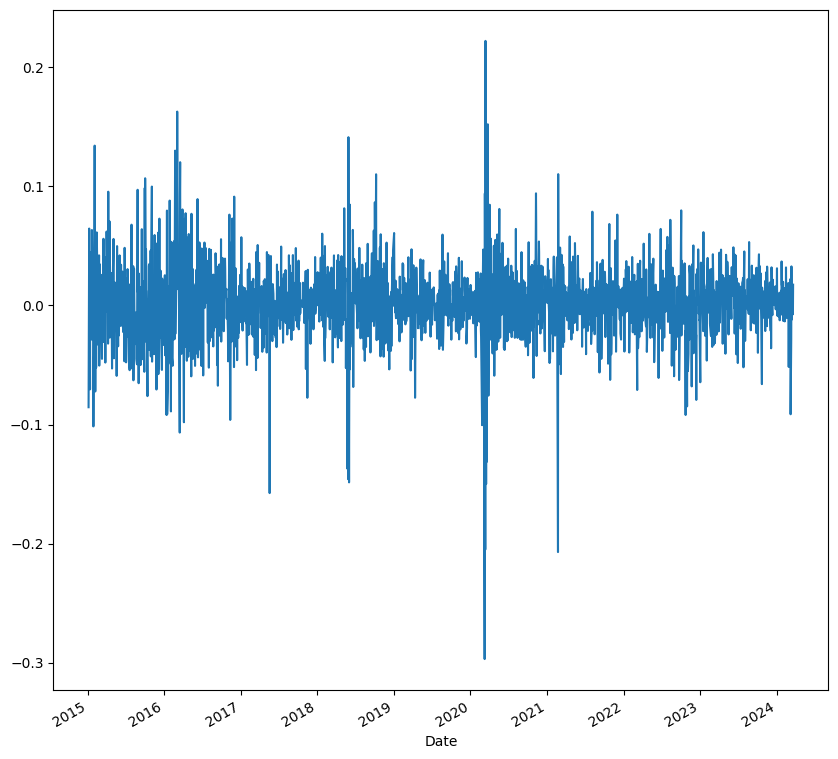

In [10]:
PETR4['TRS'].plot(figsize =(10,10))


In [11]:
retornoD =PETR4['TRS'].mean()

retornoD

0.0015174210989211474

In [12]:
retornoA =PETR4['TRS'].mean()*250

retornoA

0.37935527473028685

In [13]:
print(str(round(retornoA, 4)*100)+'%')

37.940000000000005%


# Taxa de Retorno Logaritmico


<Axes: xlabel='Date'>

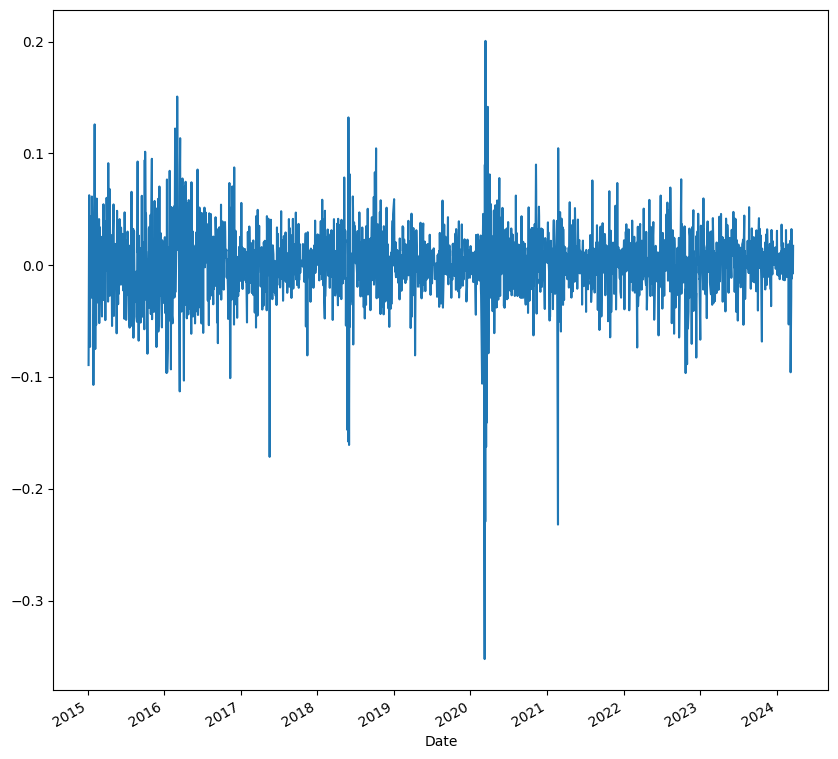

In [14]:
PETR4['TRL'] =np.log(PETR4['Adj Close']/PETR4['Adj Close'].shift(1))

PETR4['TRL'].plot(figsize =(10,10))

In [15]:
retornoLD =PETR4['TRL'].mean()

retornoLA =PETR4['TRL'].mean()*250

In [16]:
print(str(round(retornoLA, 4)*100)+'%')

25.929999999999996%


---------------------------------------

# Taxa de Retorno da Carteira na pratica

In [17]:
tickers =['PETR4.SA', 'BBDC4.SA', 'OIBR4.SA', 'AMAR3.SA', 'GOLL4.SA']

dados =pd.DataFrame()

for t in tickers:
    dados[t] =wb.get_data_yahoo(t, start='2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# ProfileReport(dados)

dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2291 entries, 2015-01-02 to 2024-03-20
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  2291 non-null   float64
 1   BBDC4.SA  2291 non-null   float64
 2   OIBR4.SA  2291 non-null   float64
 3   AMAR3.SA  2291 non-null   float64
 4   GOLL4.SA  2291 non-null   float64
dtypes: float64(5)
memory usage: 107.4 KB


# Normalização para base 100

In [19]:

dados.iloc[0]

PETR4.SA     3.412116
BBDC4.SA     8.736965
OIBR4.SA    84.300003
AMAR3.SA    60.064339
GOLL4.SA    14.990000
Name: 2015-01-02 00:00:00, dtype: float64

<Axes: xlabel='Date'>

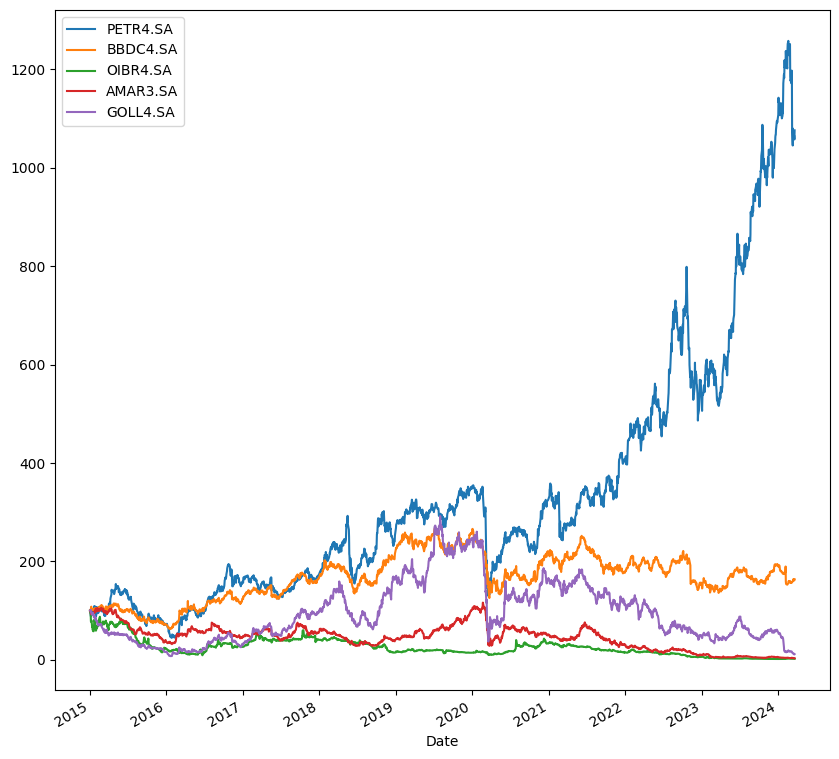

In [20]:
(dados/dados.iloc[0]*100).plot(figsize=(10,10))

# Calculo de retorno da carteira

In [21]:
# taxa de retorno simples dos titulos da carteira


retorno = (dados/dados.shift(1))-1
print(retorno)

            PETR4.SA  BBDC4.SA  OIBR4.SA  AMAR3.SA  GOLL4.SA
Date                                                        
2015-01-02       NaN       NaN       NaN       NaN       NaN
2015-01-05 -0.085470  0.002063 -0.074733 -0.007581 -0.009340
2015-01-06 -0.032710  0.032896 -0.152564 -0.061806  0.024242
2015-01-07  0.047102  0.039741 -0.013616  0.018505 -0.043392
2015-01-08  0.064590  0.005150  0.039877 -0.010901 -0.019244
...              ...       ...       ...       ...       ...
2024-03-14 -0.004398  0.006320 -0.056122 -0.016461  0.000000
2024-03-15  0.002761 -0.015352 -0.010811 -0.054393 -0.118812
2024-03-18  0.000551  0.006378 -0.027322 -0.119469 -0.044944
2024-03-19 -0.007430 -0.005634  0.078652 -0.045226 -0.011765
2024-03-20  0.017466  0.012748 -0.010417  0.052632  0.047619

[2291 rows x 5 columns]


In [22]:
# Suposição: criar um portifolio igualmente ponderado, criando matriz, nomeaando pesos

pesos =np.array([.20, .20, .20, .20, .20])

# obter retornos anuais de cada uma das ações e calculor o produto escalar desses retornos e pesos

retorno_a =retorno.mean()*250

retorno_a

PETR4.SA    0.379355
BBDC4.SA    0.119108
OIBR4.SA   -0.163458
AMAR3.SA   -0.169190
GOLL4.SA    0.061045
dtype: float64

In [23]:
np.dot(retorno_a, pesos)


# percentual

portifolio =(str(round(np.dot(retorno_a, pesos),5)*100)+'%')
print(portifolio)

4.537%


# taxa de retorno da carteira de indices

In [6]:
# !pip install pandas_datareader --upgrade
# !pip install lxml requests beautifulsoup4 --upgrade


In [11]:
tickers = ['^DJI', '^GSPC', '^IXIC', '^BVSP']
start_date = '2015-01-01'

# Usando yfinance para obter dados financeiros
ind_data = yf.download(tickers, start=start_date)['Adj Close']

print(ind_data.head())


[*********************100%%**********************]  4 of 4 completed

Ticker        ^BVSP          ^DJI        ^GSPC        ^IXIC
Date                                                       
2015-01-02  48512.0  17832.990234  2058.199951  4726.810059
2015-01-05  47517.0  17501.650391  2020.579956  4652.569824
2015-01-06  48001.0  17371.640625  2002.609985  4592.740234
2015-01-07  49463.0  17584.519531  2025.900024  4650.470215
2015-01-08  49943.0  17907.869141  2062.139893  4736.189941


In [12]:
ind_data.head(5)

Ticker,^BVSP,^DJI,^GSPC,^IXIC
Date,,,,
2015-01-02,48512.0,17832.990234,2058.199951,4726.810059
2015-01-05,47517.0,17501.650391,2020.579956,4652.569824
2015-01-06,48001.0,17371.640625,2002.609985,4592.740234
2015-01-07,49463.0,17584.519531,2025.900024,4650.470215
2015-01-08,49943.0,17907.869141,2062.139893,4736.189941


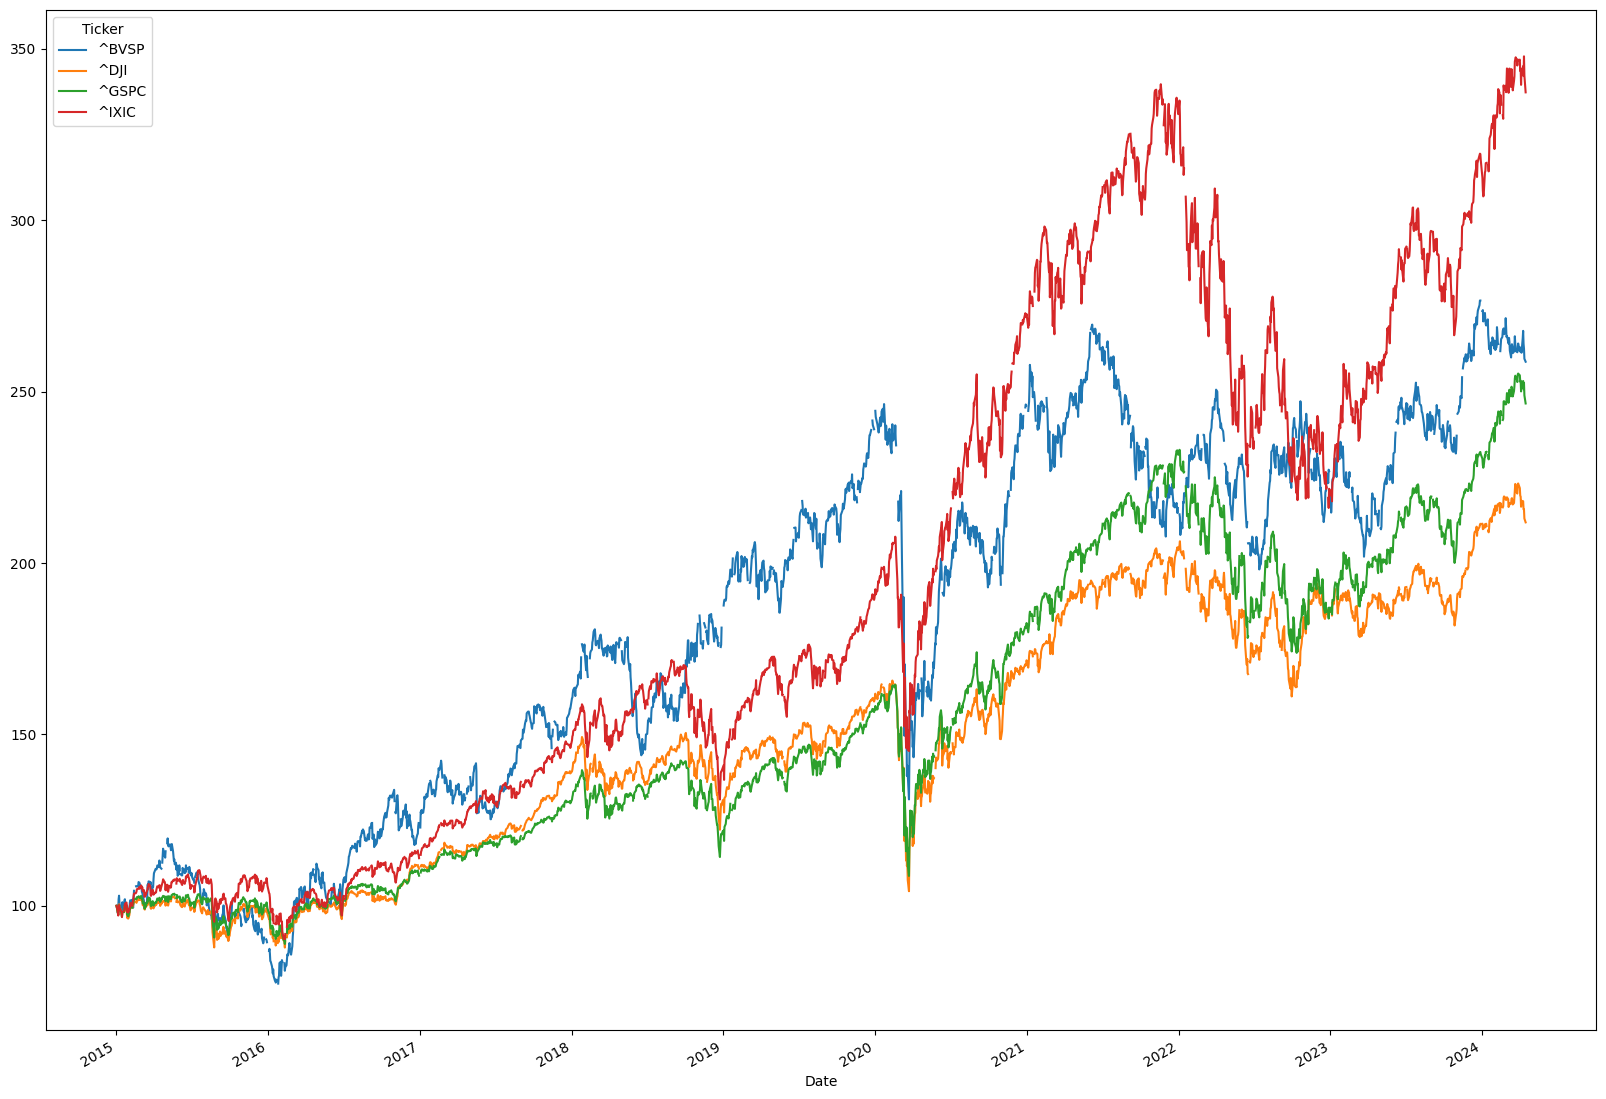

In [13]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(20,15))

plt.show()

In [15]:
def retorno_simples(ticker):
    return (ind_data[ticker]/ind_data[ticker].shift(1))-1

def retorno_anual(ticker):
    return retorno_simples(ticker).mean()*250
    

In [19]:
for t in tickers:
    print(t, str(round(retorno_anual(t)*100, 2))+'%')
    print(t, str(round(retorno_simples(t)*100, 2))+'%')
    print('-='*20)

^DJI 11.29%
^DJI Date
2015-01-02     NaN
2015-01-05   -1.86
2015-01-06   -0.74
2015-01-07    1.23
2015-01-08    1.84
              ... 
2024-04-09   -0.02
2024-04-10   -1.09
2024-04-11   -0.01
2024-04-12   -1.24
2024-04-15   -0.52
Name: ^DJI, Length: 2394, dtype: float64%
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
^GSPC 12.49%
^GSPC Date
2015-01-02     NaN
2015-01-05   -1.83
2015-01-06   -0.89
2015-01-07    1.16
2015-01-08    1.79
              ... 
2024-04-09    0.14
2024-04-10   -0.95
2024-04-11    0.74
2024-04-12   -1.46
2024-04-15   -0.95
Name: ^GSPC, Length: 2394, dtype: float64%
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
^IXIC 16.09%
^IXIC Date
2015-01-02     NaN
2015-01-05   -1.57
2015-01-06   -1.29
2015-01-07    1.26
2015-01-08    1.84
              ... 
2024-04-09    0.32
2024-04-10   -0.84
2024-04-11    1.68
2024-04-12   -1.62
2024-04-15   -1.42
Name: ^IXIC, Length: 2394, dtype: float64%
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
^BVSP 14.03%
^BVSP Date
2015-01-02     NaN
2015-01-0

In [23]:
ind_ret =(ind_data/ind_data.shift(1))-1

ind_ret.tail()

Ticker,^BVSP,^DJI,^GSPC,^IXIC
Date,,,,
2024-04-09,0.008017,-0.000235,0.001445,0.003241
2024-04-10,-0.014135,-0.010857,-0.009457,-0.008357
2024-04-11,-0.005138,-0.000063,0.007445,0.016811
2024-04-12,-0.011382,-0.012373,-0.014551,-0.016245
2024-04-15,-0.003362,-0.005245,-0.009490,-0.014199


In [24]:
ind_retorno_a =ind_ret.mean()*250

ind_retorno_a

Ticker
^BVSP    0.140275
^DJI     0.112922
^GSPC    0.124902
^IXIC    0.160919
dtype: float64

In [29]:
# avaliando desempenho de ação


start_date = '2007-01-01'

tk =[ 'PETR4.SA', '^BVSP', 'ITUB4.SA']

data_2 = pd.DataFrame()

for t in tk:
    data_2[t] =yf.download(t, start=start_date)['Adj Close']
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
data_2.tail()

,PETR4.SA,^BVSP,ITUB4.SA
Date,,,
2024-04-09,38.730000,129890.000000,33.570000
2024-04-10,39.590000,128054.000000,32.860001
2024-04-11,39.299999,127396.000000,32.799999
2024-04-12,38.939999,125946.000000,32.459999
2024-04-15,38.950001,125182.992188,31.950001


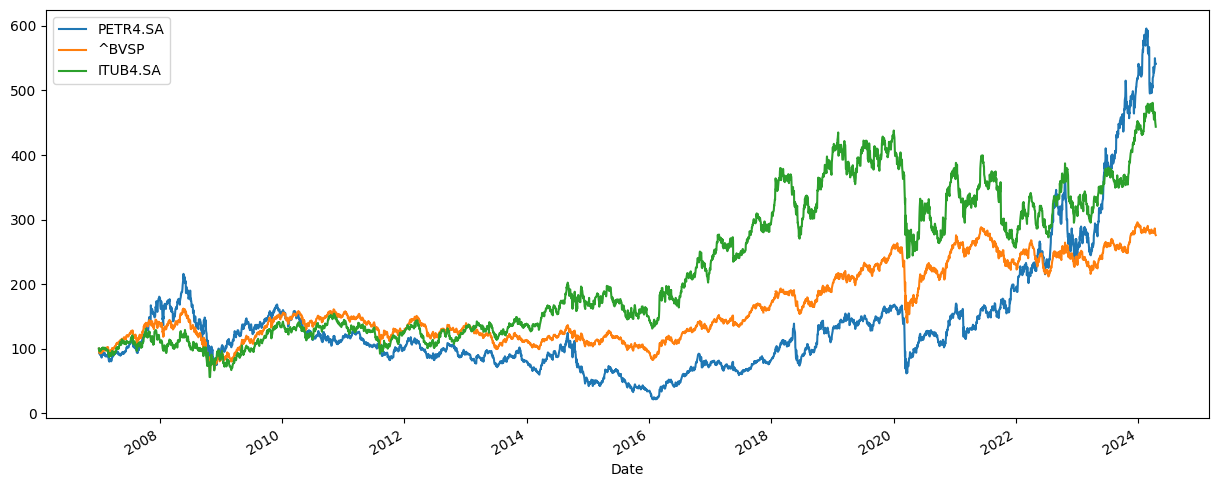

In [31]:
(data_2/ data_2.iloc[0]*100).plot(figsize=(15,6))

plt.show()

----------

# Funções Base

In [ ]:
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf

def buscar_dados_acoes(ticker, data_inicio):
    """
    Busca dados históricos de ações do Yahoo Finance.
    
    Args:
    ticker (str): O símbolo da ação (exemplo: 'PETR4.SA')
    data_inicio (str): Data de início para buscar dados (formato 'AAAA-MM-DD')

    Returns:
    DataFrame: Dados históricos da ação especificada.
    """
    yf.pdr_override()
    dados = wb.get_data_yahoo(ticker, start=data_inicio)
    return dados


In [ ]:
def calcular_retorno_simples(dados):
    """
    Calcula a taxa de retorno simples baseada nos preços ajustados de fechamento.
    
    Args:
    dados (DataFrame): DataFrame contendo os preços das ações.
    
    Returns:
    DataFrame: DataFrame original com uma nova coluna 'TRS' representando a taxa de retorno simples.
    """
    dados['TRS'] = (dados['Adj Close'] / dados['Adj Close'].shift(1)) - 1
    return dados


In [ ]:
import numpy as np

def calcular_retorno_logaritmico(dados):
    """
    Calcula a taxa de retorno logarítmico baseada nos preços ajustados de fechamento.
    
    Args:
    dados (DataFrame): DataFrame contendo os preços das ações.
    
    Returns:
    DataFrame: DataFrame original com uma nova coluna 'TRL' representando a taxa de retorno logarítmico.
    """
    dados['TRL'] = np.log(dados['Adj Close'] / dados['Adj Close'].shift(1))
    return dados


In [ ]:
import matplotlib.pyplot as plt

def normalizar_e_plotar(dados, tamanho_figura=(10, 10)):
    """
    Normaliza os dados para a base 100 e plota.
    
    Args:
    dados (DataFrame): DataFrame com dados de ações ou índices.
    tamanho_figura (tuple): Dimensões da figura para o plot.
    """
    (dados / dados.iloc[0] * 100).plot(figsize=tamanho_figura)
    plt.show()


In [ ]:
def calcular_retorno_portfolio(dados, pesos):
    """
    Calcula o retorno anualizado do portfólio baseado em pesos especificados.
    
    Args:
    dados (DataFrame): DataFrame com taxas de retorno simples de várias ações.
    pesos (list): Lista de pesos atribuídos a cada ação no portfólio.
    
    Returns:
    float: Retorno anualizado do portfólio.
    """
    retorno_diario = (dados / dados.shift(1)) - 1
    retorno_anualizado = retorno_diario.mean() * 250
    retorno_portfolio = np.dot(retorno_anualizado, pesos)
    return retorno_portfolio


----

# Esboço inicial das funções quântizadas

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.circuit import ClassicalRegister

def calcular_retorno_simples_quantico(dados):
    dados['TRS'] = (dados['Adj Close'] / dados['Adj Close'].shift(1)) - 1
    num_qubits = int(np.ceil(np.log2(len(dados['TRS'].dropna()))))
    circuito = QuantumCircuit(num_qubits)

    for i, retorno in enumerate(dados['TRS'].dropna()):
        angle = np.pi * retorno
        circuito.ry(angle, i % num_qubits)

    # Adicionando um registro clássico e medidas ao circuito
    registro_classico = ClassicalRegister(num_qubits)
    circuito.add_register(registro_classico)
    circuito.measure(range(num_qubits), range(num_qubits))  # Medir todos os qubits

    simulador = Aer.get_backend('qasm_simulator')
    circuito_transpilado = transpile(circuito, simulador)
    job = simulador.run(circuito_transpilado, shots=1)
    resultado = job.result()
    contagens = resultado.get_counts(circuito)

    return dados, contagens

# Criar dados de exemplo
data = {
    'Date': pd.date_range(start='1/1/2020', periods=5, freq='D'),
    'Adj Close': [100, 101, 102, 103, 104]
}
dados_teste = pd.DataFrame(data).set_index('Date')

# Testar a função
dados_atualizados, contagens = calcular_retorno_simples_quantico(dados_teste)

# Imprimir os resultados
print("Dados Atualizados:")
print(dados_atualizados)
print("\nContagens da Simulação Quântica:")
print(contagens)


Dados Atualizados:
            Adj Close       TRS
Date                           
2020-01-01        100       NaN
2020-01-02        101  0.010000
2020-01-03        102  0.009901
2020-01-04        103  0.009804
2020-01-05        104  0.009709

Contagens da Simulação Quântica:
{'00': 1}


In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit import ClassicalRegister
import numpy as np

def calcular_retorno_logaritmico_quantico(dados):
    """
    Calcula a taxa de retorno logarítmico e processa os retornos usando um circuito quântico.
    
    Args:
    dados (DataFrame): DataFrame contendo os preços das ações com a coluna 'Adj Close'.
    
    Returns:
    tuple: Retorna os dados atualizados e o resultado da simulação quântica.
    """
    dados['TRL'] = np.log(dados['Adj Close'] / dados['Adj Close'].shift(1))
    num_qubits = int(np.ceil(np.log2(len(dados['TRL'].dropna()))))
    circuito = QuantumCircuit(num_qubits)

    for i, retorno in enumerate(dados['TRL'].dropna()):
        angle = np.pi * retorno  # Usar o valor do retorno logarítmico para determinar o ângulo da rotação
        circuito.ry(angle, i % num_qubits)

    # Adicionando um registro clássico e medidas ao circuito
    registro_classico = ClassicalRegister(num_qubits)
    circuito.add_register(registro_classico)
    circuito.measure(range(num_qubits), range(num_qubits))  # Medir todos os qubits

    simulador =  Aer.get_backend('qasm_simulator')
    circuito_transpilado = transpile(circuito, simulador)
    job = simulador.run(circuito_transpilado, shots=1)
    resultado = job.result()
    contagens = resultado.get_counts(circuito)

    return dados, contagens



# Criar dados de exemplo
data = {
    'Date': pd.date_range(start='1/1/2020', periods=5, freq='D'),
    'Adj Close': [100, 101, 102, 103, 104]
}
dados_teste = pd.DataFrame(data).set_index('Date')

# Testar a função
dados_atualizados, contagens = calcular_retorno_logaritmico_quantico(dados_teste)

# Imprimir os resultados
print("Dados Atualizados:")
print(dados_atualizados)
print("\nContagens da Simulação Quântica:")
print(contagens)


Dados Atualizados:
            Adj Close       TRL
Date                           
2020-01-01        100       NaN
2020-01-02        101  0.009950
2020-01-03        102  0.009852
2020-01-04        103  0.009756
2020-01-05        104  0.009662

Contagens da Simulação Quântica:
{'00': 1}


In [42]:
def normalizar_e_plotar(dados, tamanho_figura=(10, 10)):
    (dados / dados.iloc[0] * 100).plot(figsize=tamanho_figura)
    plt.show()


In [44]:
def calcular_retorno_portfolio_quantico(dados, pesos):
    retorno_diario = (dados / dados.shift(1)) - 1
    retorno_anualizado = retorno_diario.mean() * 250
    retorno_portfolio = np.dot(retorno_anualizado, pesos)

    # Imaginando uma aplicação quântica, como otimizar pesos
    # Detalhes específicos seriam necessários para um exemplo prático aqui

    return retorno_portfolio



In [45]:
# Criar dados de exemplo para várias ações
data = {
    'Date': pd.date_range(start='2020-01-01', periods=5, freq='D'),
    'AAPL': [150, 152, 153, 154, 155],
    'GOOGL': [1200, 1205, 1208, 1210, 1215],
    'AMZN': [3100, 3120, 3130, 3140, 3160]
}
dados_teste = pd.DataFrame(data).set_index('Date')

# Definir pesos para o portfólio, assumindo igual ponderação para simplificação
pesos = np.array([1/3, 1/3, 1/3])

# Testar a função
retorno_portfolio = calcular_retorno_portfolio_quantico(dados_teste[['AAPL', 'GOOGL', 'AMZN']], pesos)

# Imprimir o retorno anualizado do portfólio
print("Retorno Anualizado do Portfólio:", retorno_portfolio)

Retorno Anualizado do Portfólio: 1.3459780148594584
